# Лабараторная работа по python № 1

# Автор: Ежов Дмитрий Александрович

Группа: J3111, ИСУ: 471242


In [69]:
# Download dataset: Seoul Bike Sharing Demand
# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
%pip install ucimlrepo

# import
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


# I. Подготовка данных и базовые операции с NumPy

## 1. Загрузка и подготовка данных:


In [70]:
# Import data, show metadata

# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

seoul_bike_sharing_demand = fetch_ucirepo(id=560)
# print(seoul_bike_sharing_demand)

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [71]:
# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

print(X)
print(y)


# Nulls. Zero nulls
print(X.isnull().sum())
print(y.isnull().sum())

# Categorical
print(X["Seasons"].astype("category"))
X["Holiday"] = X["Holiday"].map({"No Holiday": 0, "Holiday": 1})
y["Functioning Day"] = y["Functioning Day"].map({"No": 0, "Yes": 1})
X["Seasons"] = X["Seasons"].map({"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3})


            Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0      1/12/2017                254     0         -5.2        37         2.2   
1      1/12/2017                204     1         -5.5        38         0.8   
2      1/12/2017                173     2         -6.0        39         1.0   
3      1/12/2017                107     3         -6.2        40         0.9   
4      1/12/2017                 78     4         -6.0        36         2.3   
...          ...                ...   ...          ...       ...         ...   
8755  30/11/2018               1003    19          4.2        34         2.6   
8756  30/11/2018                764    20          3.4        37         2.3   
8757  30/11/2018                694    21          2.6        39         0.3   
8758  30/11/2018                712    22          2.1        41         1.0   
8759  30/11/2018                584    23          1.9        43         1.3   

      Visibility  Dew point temperature

/tmp/ipykernel_108675/4189243717.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Holiday"] = X["Holiday"].map({"No Holiday": 0, "Holiday": 1})
/tmp/ipykernel_108675/4189243717.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Functioning Day"] = y["Functioning Day"].map({"No": 0, "Yes": 1})
/tmp/ipykernel_108675/4189243717.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

## 2. Основные операции с NumPy:


In [72]:
# Create a vector of each feature
feature_columns = {col: np.asarray(X[col]) for col in X.columns}
print(feature_columns["Rented Bike Count"])  # for example
# Create a matrix of features
weather_matrix = X[
    [
        "Temperature",
        "Wind speed",
        "Humidity",
        "Visibility",
        "Dew point temperature",
        "Solar Radiation",
        "Rainfall",
        "Snowfall",
        "Seasons",
    ]
].values
features = np.concatenate((X.values, y.values), axis=1)
print(features)
print(weather_matrix)

[254 204 173 ... 694 712 584]
[['1/12/2017' 254 0 ... 0 0 1]
 ['1/12/2017' 204 1 ... 0 0 1]
 ['1/12/2017' 173 2 ... 0 0 1]
 ...
 ['30/11/2018' 694 21 ... 3 0 1]
 ['30/11/2018' 712 22 ... 3 0 1]
 ['30/11/2018' 584 23 ... 3 0 1]]
[[-5.2  2.2 37.  ...  0.   0.   0. ]
 [-5.5  0.8 38.  ...  0.   0.   0. ]
 [-6.   1.  39.  ...  0.   0.   0. ]
 ...
 [ 2.6  0.3 39.  ...  0.   0.   3. ]
 [ 2.1  1.  41.  ...  0.   0.   3. ]
 [ 1.9  1.3 43.  ...  0.   0.   3. ]]


## 3. Индексация и срезы:


In [73]:
# Get subvector where rented bike count = 0
mask = feature_columns["Rented Bike Count"] == 0
print(feature_columns["Date"][mask][:10])
# Get submatrix with temperature, Wind speed
print(weather_matrix)
print(weather_matrix[:, 0:2])

# compare the average values in December and June
import re

md = np.vectorize(
    lambda x: bool(re.match(r"\b\d{2}/12/\d{4}\b", x))
)  # regex for find data in December
maskd = md(feature_columns["Date"])
print(feature_columns["Rented Bike Count"][maskd].mean())
mj = np.vectorize(
    lambda x: bool(re.match(r"\b\d{2}/06/\d{4}\b", x))
)  # regex for find data in June
maskj = mj(feature_columns["Date"])
print(feature_columns["Rented Bike Count"][maskj].mean())

['11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018'
 '11/4/2018' '11/4/2018' '11/4/2018' '11/4/2018']
[[-5.2  2.2 37.  ...  0.   0.   0. ]
 [-5.5  0.8 38.  ...  0.   0.   0. ]
 [-6.   1.  39.  ...  0.   0.   0. ]
 ...
 [ 2.6  0.3 39.  ...  0.   0.   3. ]
 [ 2.1  1.  41.  ...  0.   0.   3. ]
 [ 1.9  1.3 43.  ...  0.   0.   3. ]]
[[-5.2  2.2]
 [-5.5  0.8]
 [-6.   1. ]
 ...
 [ 2.6  0.3]
 [ 2.1  1. ]
 [ 1.9  1.3]]
213.1193181818182
1216.648148148148


# I. Операции с векторами и матрицами

## 1. Операции над векторами


In [74]:
# simple operations
print((feature_columns["Rainfall"] * 10 + feature_columns["Snowfall"]).max())
# broadcasting
print(feature_columns["Temperature"][:, np.newaxis] * feature_columns["Humidity"])

350.0
[[-192.4 -197.6 -202.8 ... -202.8 -213.2 -223.6]
 [-203.5 -209.  -214.5 ... -214.5 -225.5 -236.5]
 [-222.  -228.  -234.  ... -234.  -246.  -258. ]
 ...
 [  96.2   98.8  101.4 ...  101.4  106.6  111.8]
 [  77.7   79.8   81.9 ...   81.9   86.1   90.3]
 [  70.3   72.2   74.1 ...   74.1   77.9   81.7]]


## 2. Скалярное произведение:


In [75]:
# dot product of vectors
print(feature_columns["Rainfall"].T.dot(feature_columns["Rented Bike Count"]))
print(feature_columns["Temperature"].T.dot(feature_columns["Rented Bike Count"]))
# Temperature has a stronger effect than rain

133299.9
115860790.8


# III. Анализ сходства между векторами

## 1. Корреляция и косинусное сходство:


In [76]:
# Pearson correlation
def pearson_correlation(x: np.array, y: np.array) -> float:
    if len(x) != len(y):
        raise ValueError("Vectors must be the same length")
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x) * (y - mean_y))
    std_x = np.sqrt(np.sum((x - mean_x) ** 2))
    std_y = np.sqrt(np.sum((y - mean_y) ** 2))

    if std_x == 0 or std_y == 0:
        return 0
    return covariance / (std_x * std_y)


# Verify
%pip install scipy
from scipy.stats import pearsonr

print(
    f"My pearson correlation between Temperature and Solar Radiation: {pearson_correlation(feature_columns['Temperature'], feature_columns['Solar Radiation'])}\n"
    f"Scipy pearosn correlation: {pearsonr(feature_columns['Temperature'], feature_columns['Solar Radiation'])[0]}",
)

Note: you may need to restart the kernel to use updated packages.
My pearson correlation between Temperature and Solar Radiation: 0.353505470147949
Scipy pearosn correlation: 0.3535054701479491


In [77]:
# Cosine correlation
def cosine_similarity(x: np.array, y: np.array) -> float:
    if len(x) != len(y):
        raise ValueError("Vectors must be the same length")

    dot_product = np.dot(x, y)

    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)

    if norm_x == 0 or norm_y == 0:
        return 0
    return dot_product / (norm_x * norm_y)


# Verify
%pip install scikit-learn
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

print(
    f"My cosine similary between Temperature and Solar Radiation: {cosine_similarity(feature_columns['Wind speed'], feature_columns['Rainfall'])}\n"
    f"Scipy cosine similary: {sklearn_cosine_similarity([feature_columns['Wind speed']], [feature_columns['Rainfall']])[0][0]}",
)

Note: you may need to restart the kernel to use updated packages.
My cosine similary between Temperature and Solar Radiation: 0.1019666341265934
Scipy cosine similary: 0.10196663412659379


## 2. Нормализация векторов


In [78]:
def normalize(v: np.array) -> np.array:
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm


print(feature_columns["Hour"])
print(normalize(feature_columns["Hour"]))

[ 0  1  2 ... 21 22 23]
[0.         0.000796   0.00159199 ... 0.01671591 0.01751191 0.0183079 ]


## 3. Поиск сходства


In [79]:
def euclidean_distance(vec1: np.array, vec2: np.array) -> float:
    return np.sqrt(np.sum((vec1 - vec2) ** 2))


def find_most_similar_days(
    query_vector: np.array, data_vectors: np.array, k: int = 4
) -> list[np.array]:
    distances = []

    for i, data_vector in enumerate(data_vectors):
        distance = euclidean_distance(query_vector, data_vector)
        distances.append((distance, i))  # better insert sort

    sorted_distances = sorted(distances, key=lambda x: x[0])

    return [index for _, index in sorted_distances[:k]]


most_sim_days = find_most_similar_days(features[0][1:], features[:, 1:])

for i in most_sim_days:
    print(f"Day index: {i}")
    print(features[i])

Day index: 0
['1/12/2017' 254 0 -5.2 37 2.2 2000 -17.6 0.0 0.0 0.0 0 0 1]
Day index: 655
['28/12/2017' 257 7 -5.0 31 0.5 2000 -19.5 0.0 0.0 0.0 0 0 1]
Day index: 631
['27/12/2017' 262 7 -10.1 38 2.3 2000 -21.7 0.0 0.0 0.0 0 0 1]
Day index: 372
['16/12/2017' 252 12 -4.1 28 3.8 1998 -19.9 1.08 0.0 0.0 0 0 1]


# IV. Прогнозирование и кластеризация

## 1. Фильтрация временных рядов:


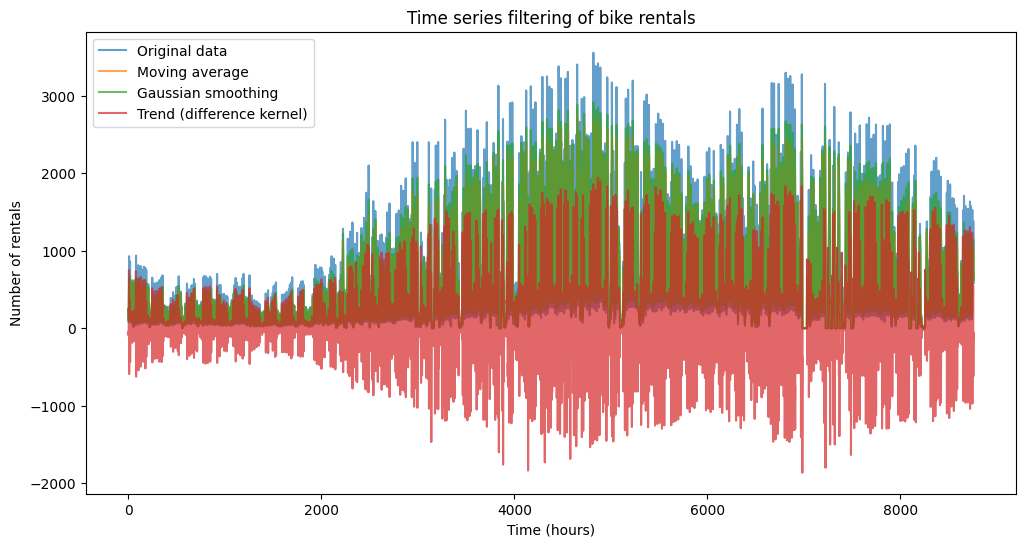

In [80]:
# 1. Time series filtering
def apply_filter(time_series: np.array, kernel: np.array) -> np.array:
    n = len(time_series)
    k = len(kernel)
    padded = np.pad(time_series, (k // 2, k // 2), mode="edge")
    smoothed = np.array([np.dot(padded[i : i + k], kernel) for i in range(n)])
    return smoothed


# Example kernels
# Rectangular kernel (moving average)
kernel_mean = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # Window of 5
# Gaussian kernel (smoothing)
kernel_gaussian = np.array([0.05, 0.25, 0.4, 0.25, 0.05])
# Trend detection kernel (difference)
kernel_trend = np.array([-1, 0, 1])

# Applying filters to bike rental data
bike_counts = feature_columns["Rented Bike Count"]
smoothed_mean = apply_filter(bike_counts, kernel_mean)
smoothed_gaussian = apply_filter(bike_counts, kernel_gaussian)
trend = apply_filter(bike_counts, kernel_trend)


plt.figure(figsize=(12, 6))
plt.plot(bike_counts, alpha=0.7, label="Original data")
plt.plot(smoothed_mean, alpha=0.7, label="Moving average")
plt.plot(smoothed_gaussian, alpha=0.7, label="Gaussian smoothing")
plt.plot(trend, alpha=0.7, label="Trend (difference kernel)")
plt.legend()
plt.title("Time series filtering of bike rentals")
plt.xlabel("Time (hours)")
plt.ylabel("Number of rentals")
plt.show()


/tmp/ipykernel_108675/2934706474.py:28: RuntimeWarning: invalid value encountered in divide
  - daily_data.mean(axis=1, keepdims=True) / daily_data.std(axis=1, keepdims=True)


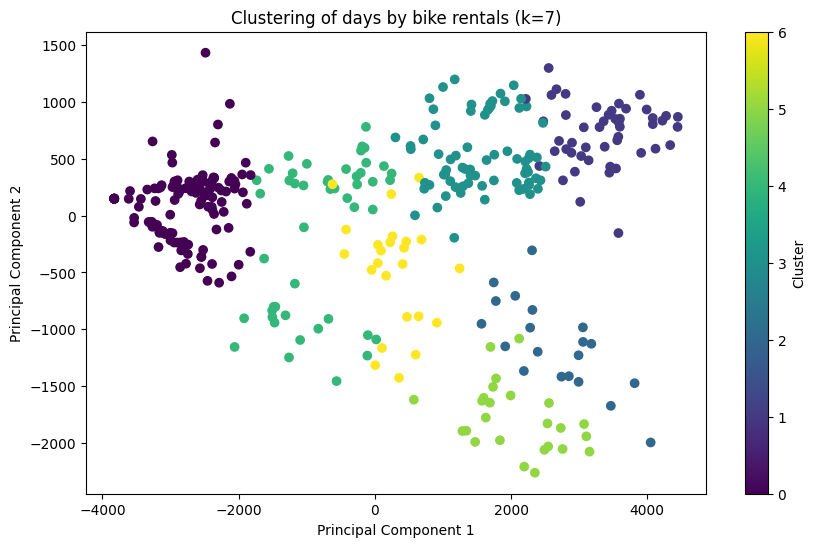

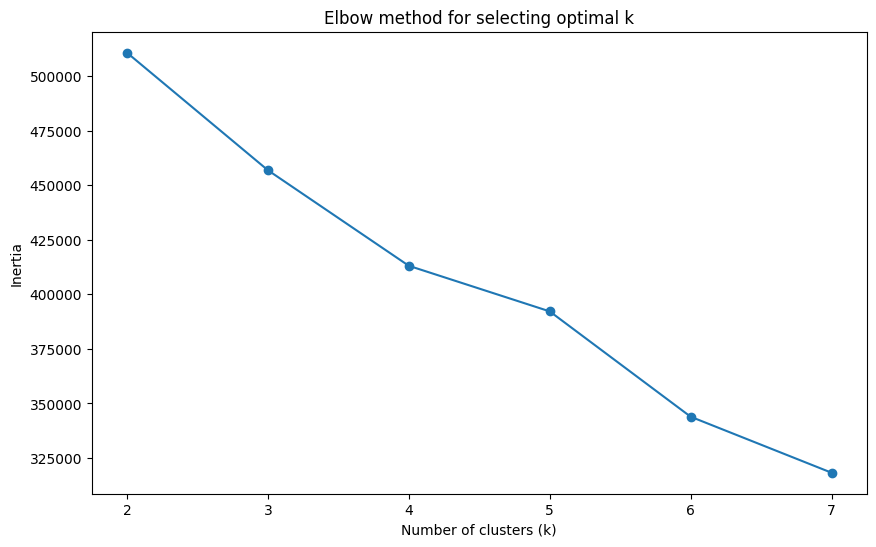

In [81]:
def k_means(
    data: np.array, k: int, max_iters: int = 128, tol: float = 1e-4
) -> tuple[np.array, np.array]:
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids


# Data preparation: grouping by days (each day is a vector of 24 hours)
days = X["Date"].unique()
daily_data = np.array(
    [
        bike_counts[X["Date"] == day]
        for day in days
        if len(bike_counts[X["Date"] == day]) == 24
    ]
)

# Data normalization
daily_data_normalized = np.nan_to_num(
    daily_data
    - daily_data.mean(axis=1, keepdims=True) / daily_data.std(axis=1, keepdims=True)
)

# Example clustering with k=3
k = 7
labels, centroids = k_means(daily_data_normalized, k)

# Cluster visualization (PCA for 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
daily_data_2d = pca.fit_transform(daily_data)


plt.figure(figsize=(10, 6))
plt.scatter(daily_data_2d[:, 0], daily_data_2d[:, 1], c=labels, cmap="viridis")
plt.title(f"Clustering of days by bike rentals (k={k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Investigating the influence of k (elbow method)
inertias = []
k_values = range(2, 8)
for k in k_values:
    labels, centroids = k_means(daily_data_normalized, k)
    inertia = sum(
        np.linalg.norm(daily_data_normalized[labels == i] - centroids[i], axis=1).sum()
        for i in range(k)
    )
    inertias.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow method for selecting optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.show()

# V. Генерация случайных данных и анализ
## 1. Генерация случайных данных:

In [ ]:
# Generating random data with similar statistical characteristics
num_samples = len(X)
random_temp = np.random.normal(
    loc=X["Temperature"].mean(), scale=X["Temperature"].std(), size=num_samples
)
random_humidity = np.random.normal(
    loc=X["Humidity"].mean(), scale=X["Humidity"].std(), size=num_samples
)
random_rentals = np.random.normal(
    loc=X["Rented Bike Count"].mean(),
    scale=X["Rented Bike Count"].std(),
    size=num_samples,
)

# Creating DataFrame
random_data = pd.DataFrame(
    {
        "Temperature": random_temp,
        "Humidity": random_humidity,
        "Rented_Bike_Count": random_rentals,
    }
)


## 2. Анализ случайных данных:

In [83]:
real_corr = X[["Temperature", "Humidity"]].corrwith(y["Functioning Day"])
random_corr = random_data[["Temperature", "Humidity"]].corrwith(
    random_data["Rented_Bike_Count"]
)

print("Real correlations:")
print(real_corr)
print("\nRandom correlations:")
print(random_corr)

# Comparing cosine similarity
real_features = X[["Temperature", "Humidity"]].values
random_features = random_data[["Temperature", "Humidity"]].values

cos_sim = cosine_similarity(real_features.T, random_features.T)
print(
    f"\nCosine similarity between real and random data: {np.diag(cos_sim).mean():.2f}"
)


Real correlations:
Temperature   -0.05017
Humidity      -0.02080
dtype: float64

Random correlations:
Temperature    0.018366
Humidity      -0.012916
dtype: float64


ValueError: shapes (2,8760) and (2,8760) not aligned: 8760 (dim 1) != 2 (dim 0)

# VI. Визуализация результатов
## 1. Визуализация данных:

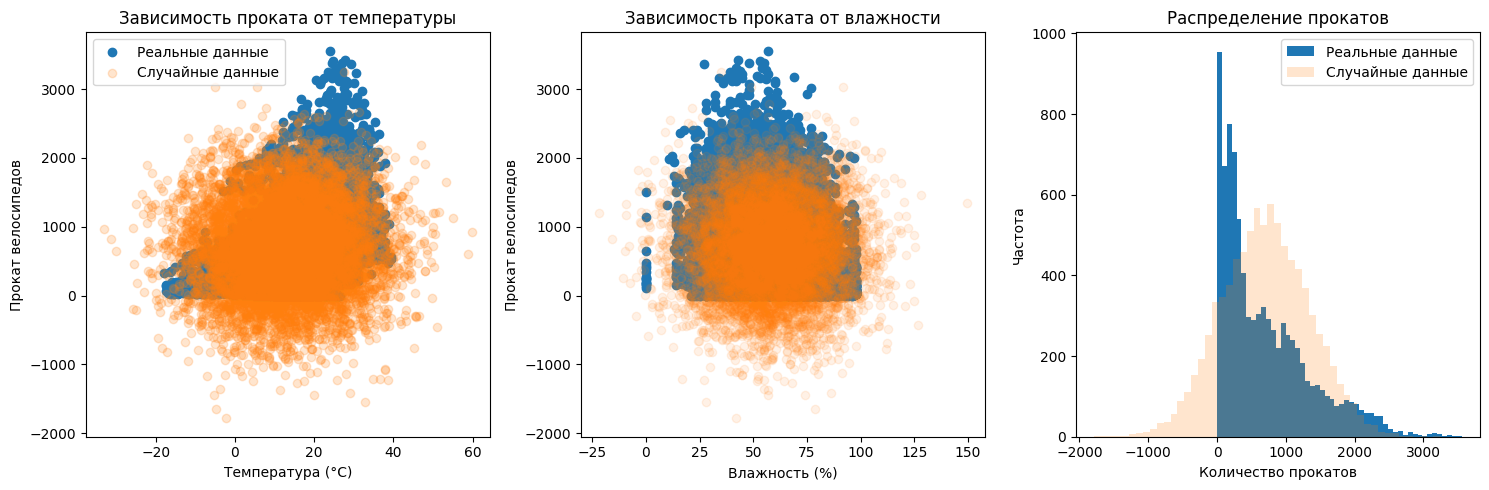

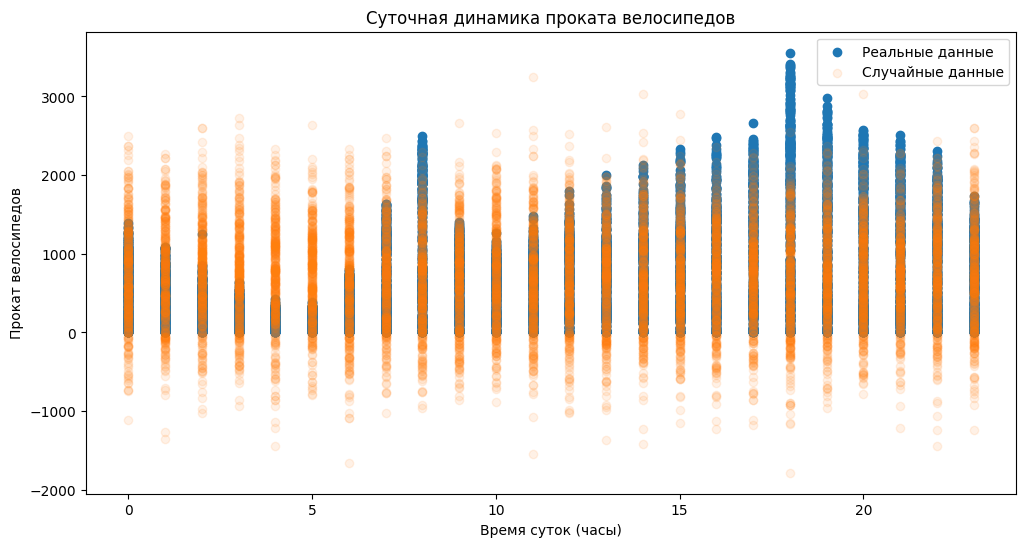

In [ ]:
plt.figure(figsize=(15, 5))

# Plot of rentals vs temperature
Y = X["Rented Bike Count"]
plt.subplot(131)
plt.scatter(X["Temperature"], Y, alpha=1, label="Real data")
plt.scatter(
    random_data["Temperature"],
    random_data["Rented_Bike_Count"],
    alpha=0.2,
    label="Random data",
)
plt.xlabel("Temperature (°C)")
plt.ylabel("Bike rentals")
plt.title("Dependence of rentals on temperature")
plt.legend()

# Plot of rentals vs humidity
plt.subplot(132)
plt.scatter(X["Humidity"], Y, alpha=1, label="Real data")
plt.scatter(
    random_data["Humidity"],
    random_data["Rented_Bike_Count"],
    alpha=0.1,
    label="Random data",
)
plt.xlabel("Humidity (%)")
plt.ylabel("Bike rentals")
plt.title("Dependence of rentals on humidity")

# Histograms of distributions
plt.subplot(133)
plt.hist(Y, bins=50, alpha=1, label="Real data")
plt.hist(random_data["Rented_Bike_Count"], bins=50, alpha=0.2, label="Random data")
plt.xlabel("Number of rentals")
plt.ylabel("Frequency")
plt.title("Distribution of rentals")
plt.legend()

plt.tight_layout()
plt.show()

# Time series visualization
plt.figure(figsize=(12, 6))
plt.plot(X["Hour"], Y, label="Real data", alpha=0.7)
plt.plot(X["Hour"], random_data["Rented_Bike_Count"], label="Random data", alpha=0.3)
plt.xlabel("Time of day (hours)")
plt.ylabel("Bike rentals")
plt.title("Daily dynamics of bike rentals")
plt.legend()
plt.show()
